In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 10 07:01:42 2020

@author: lalitha
"""

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd

# for pandas_datareader, otherwise it might have issues
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time


c:\users\lalitha\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


c:\users\lalitha\appdata\local\programs\python\python37-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


connected to yahoo
        Date       High        Low       Open      Close      Volume  \
0 2017-10-02  49.700001  49.250000  49.389999  49.360001   9525800.0   
1 2017-10-03  50.020000  49.430000  49.450001  49.849998  10218600.0   
2 2017-10-04  50.080002  49.380001  49.639999  49.900002   9887500.0   
3 2017-10-05  50.029999  49.680000  49.959999  49.770000  12230600.0   
4 2017-10-06  49.200001  48.660000  49.040001  48.810001  13239600.0   

   Adj Close  
0  44.214649  
1  44.653572  
2  44.698353  
3  44.581909  
4  44.246506  


<Figure size 2400x1200 with 1 Axes>

connected to yahoo
        Date        High         Low        Open       Close     Volume  \
0 2017-10-03  524.500000  520.000000  522.000000  521.950012  2808823.0   
1 2017-10-04  522.900024  519.049988  521.099976  521.400024  2262048.0   
2 2017-10-05  524.299988  519.250000  521.900024  521.599976   951792.0   
3 2017-10-06  522.900024  520.000000  521.000000  521.650024  2112206.0   
4 2017-10-09  531.450012  523.750000  526.700012  525.750000  1782320.0   

    Adj Close  
0  513.989807  
1  513.448181  
2  513.645142  
3  513.694397  
4  517.731812  
          Date        High         Low        Open       Close      Volume  \
315 2019-01-10  455.500000  448.799988  452.500000  451.350006   3412584.0   
316 2019-01-11  455.250000  449.250000  452.899994  451.049988   2587687.0   
317 2019-01-14  451.750000  442.299988  450.950012  448.100006   2341591.0   
318 2019-01-15  463.200012  450.000000  452.399994  456.799988   6762709.0   
319 2019-01-16  475.750000  450.200012  467.

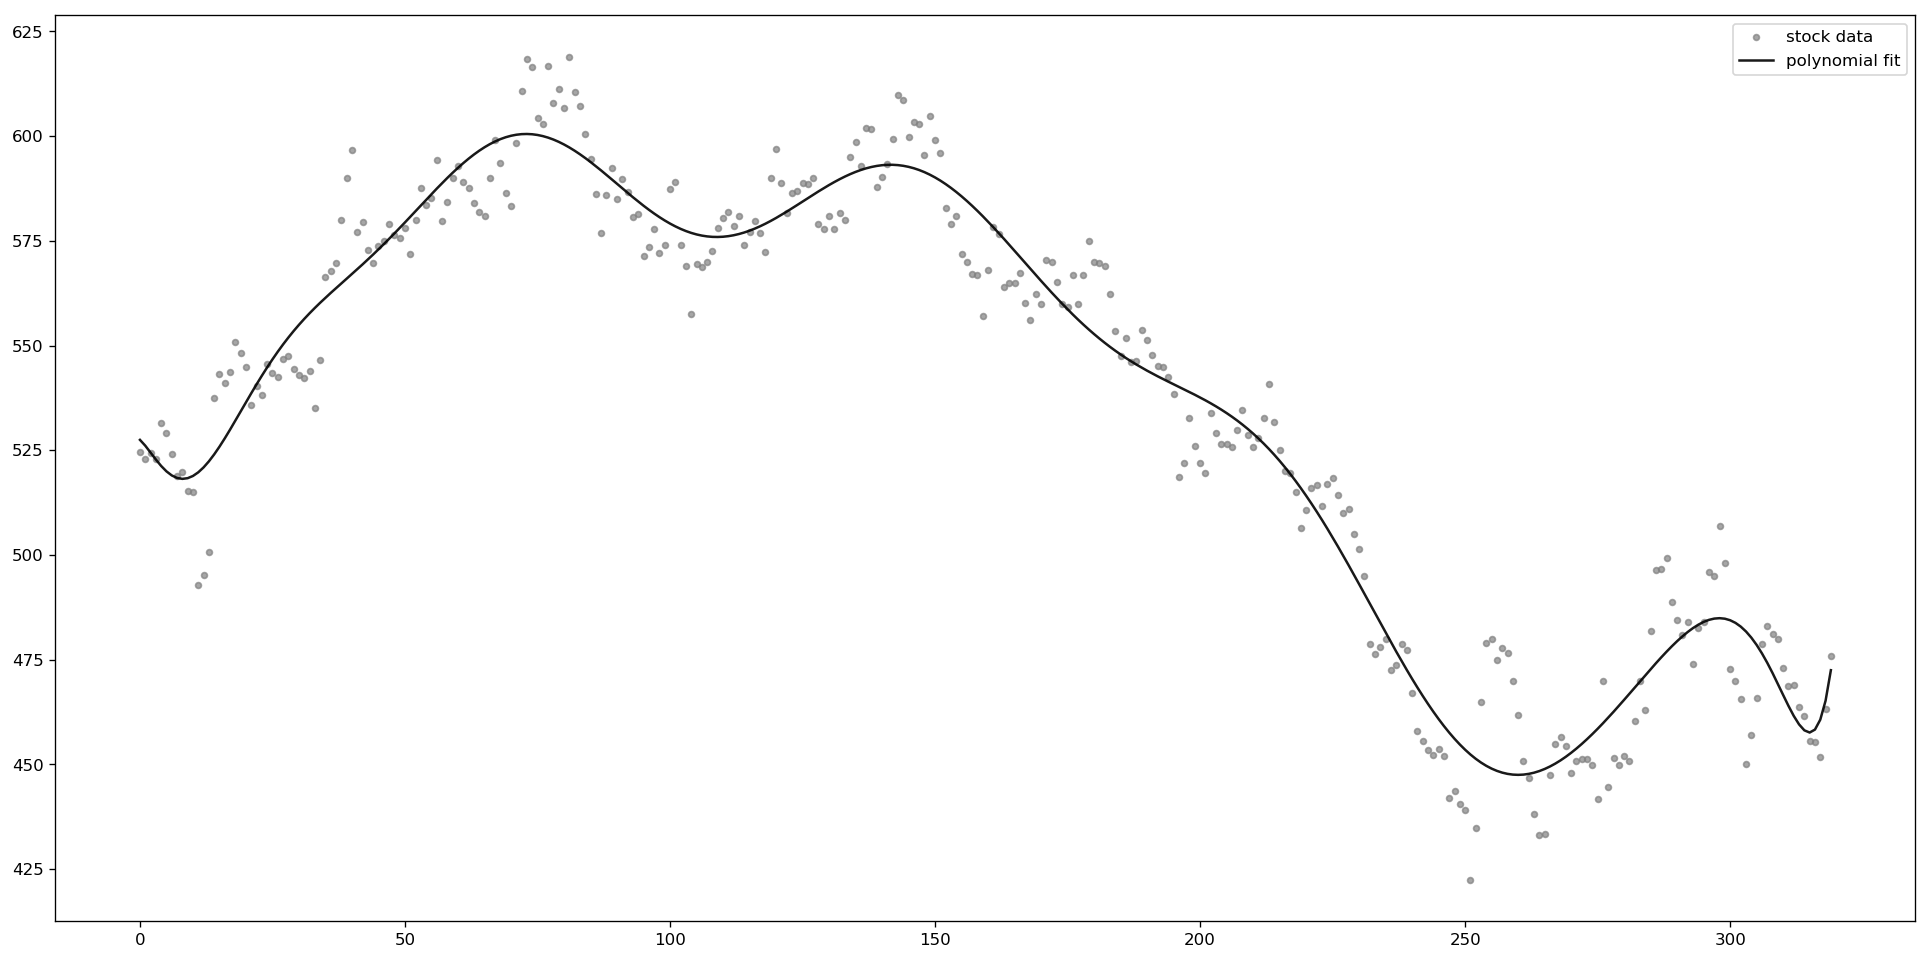

In [25]:

ticker = 'ZEEL.NS'
start_time = datetime.datetime(2017, 10, 1)
end_time = datetime.datetime(2019, 1, 15)
#end_time = datetime.datetime.now().date().isoformat()  

connected = False
while not connected:
    try:
        ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
ticker_df = ticker_df.reset_index()
print(ticker_df.head(5))
print(ticker_df.tail(5))
x_data = ticker_df.index.tolist()      # the index will be our x axis, not date
y_data = ticker_df['High']

# x values for the polynomial fit, 200 points
x = np.linspace(0, max(ticker_df.index.tolist()), max(ticker_df.index.tolist()) + 1)

# polynomial fit of degree xxx
pol = np.polyfit(x_data, y_data, 15)
y_pol = np.polyval(pol, x)

# ___ plotting ___
plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
# plot stock data
plt.plot(x_data, y_data, 'o', markersize=3.5, color='grey', alpha=0.7)
# plot polynomial fit
plt.plot(x, y_pol, '-', markersize=1.0, color='black', alpha=0.9)
plt.legend(['stock data', 'polynomial fit'])
plt.show()

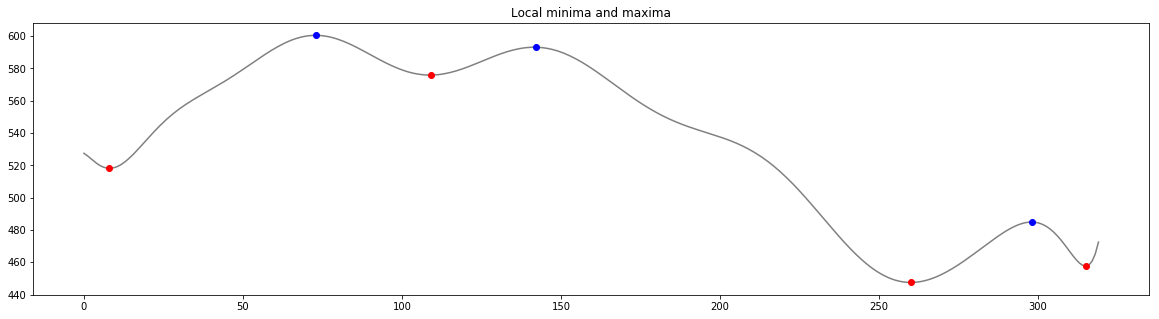

In [26]:
data = y_pol

#                         ___ detection of local minimums and maximums ___

min_max = np.diff(np.sign(np.diff(data))).nonzero()[0] + 1          # local min & max
l_min = (np.diff(np.sign(np.diff(data))) > 0).nonzero()[0] + 1      # local min
l_max = (np.diff(np.sign(np.diff(data))) < 0).nonzero()[0] + 1      # local max
# +1 due to the fact that diff reduces the original index number

# plot
plt.figure(figsize=(20, 5))
plt.plot(x, data, color='grey')
plt.plot(x[l_min], data[l_min], "o", label="min", color='r')        # minima
plt.plot(x[l_max], data[l_max], "o", label="max", color='b')        # maxima
plt.title('Local minima and maxima')
plt.show()

In [20]:
print('corresponding HIGH values for suspected indices: ')
print(ticker_df.High.iloc[l_max])
print(ticker_df.Low.iloc[l_min])

#extend the suspected x range:
delta = 5                                        # how many ticks to the left and to the right from local maximum on x axis

dict_i = dict()

for element in l_max:
    l_bound = element - delta                    # lower bound
    u_bound = element + delta                    # upper bound
    x_range = range(l_bound, u_bound + 1)

    y_loc_list = list()
    for x_element in x_range:
        y_loc_list.append(ticker_df.High.iloc[x_element]) 
        #print(y_loc_list)   
    dict_i[element] = y_loc_list
print('DICTIONARY for l_max: ', dict_i)

corresponding HIGH values for suspected indices: 
66     590.049988
137    602.000000
319    475.750000
542    282.299988
Name: High, dtype: float64
109    565.099976
282    440.100006
511    281.600006
564    267.149994
Name: Low, dtype: float64
DICTIONARY for l_max:  {66: [589.0, 587.5, 584.0, 581.9500122070312, 581.0, 590.0499877929688, 599.0499877929688, 593.5999755859375, 586.5, 583.25, 598.4500122070312], 137: [581.5499877929688, 580.0499877929688, 594.9500122070312, 598.7000122070312, 592.9500122070312, 602.0, 601.75, 587.9500122070312, 590.3499755859375, 593.4500122070312, 599.4000244140625], 319: [461.6499938964844, 455.5, 455.25, 451.75, 463.20001220703125, 475.75, 457.04998779296875, 445.0, 445.0, 437.3500061035156, 439.79998779296875], 542: [286.75, 286.25, 283.0, 286.6000061035156, 281.3999938964844, 282.29998779296875, 287.95001220703125, 296.3999938964844, 303.25, 299.0, 304.8999938964844]}


In [13]:
y_delta = 0.05                              # percentage distance between average highs
threshold = max(ticker_df['High']) * 0.90   # setting threshold lower than the global high

y_dict = dict()
maxi = list()
suspected_tops = list()
suspected_bottoms = list()

for key in dict_i.keys():
    mn = sum(dict_i[key])/len(dict_i[key])
    maxi.append(max(dict_i[key]))
    l_y = mn * (1.0 - y_delta)
    u_y = mn * (1.0 + y_delta)
    y_dict[key] = [l_y, u_y, mn]

print('SCREENING FOR DOUBLE TOP:')    

for key_i in y_dict.keys():    
    for key_j in y_dict.keys():    
        if (key_i != key_j) and (y_dict[key_i][2] > threshold):

            if (y_dict[key_i][2] < y_dict[key_j][1]) and (y_dict[key_i][2] > y_dict[key_j][0]):
                print('----------------------- ')
                print('--- Topping pattern found for x index pair: ', key_i, ',', key_j)
                suspected_tops.append(key_i)
                print('----------------------- ')
            else:
                print('Not found yet')

                
y_dict = dict()
maxi = list()

for key in dict_i.keys():
    mn = sum(dict_i[key])/len(dict_i[key])
    maxi.append(min(dict_i[key]))
    l_y = mn * (1.0 - y_delta)
    u_y = mn * (1.0 + y_delta)
    y_dict[key] = [l_y, u_y, mn]

print('SCREENING FOR DOUBLE Bottom:')    

for key_i in y_dict.keys():    
    for key_j in y_dict.keys():    
        if (key_i != key_j) and (y_dict[key_i][2] > threshold):

            if (y_dict[key_i][2] > y_dict[key_j][1]) and (y_dict[key_i][2] < y_dict[key_j][0]):
                print('----------------------- ')
                print('--- Bottom pattern found for x index pair: ', key_i, ',', key_j)
                suspected_bottoms.append(key_i)
                print('----------------------- ')
            else:
                print('Not found yet')

SCREENING FOR DOUBLE TOP:
----------------------- 
--- Topping pattern found for x index pair:  68 , 135
----------------------- 
Not found yet
Not found yet
----------------------- 
--- Topping pattern found for x index pair:  135 , 68
----------------------- 
Not found yet
Not found yet
SCREENING FOR DOUBLE Bottom:
Not found yet
Not found yet
Not found yet
Not found yet
Not found yet
Not found yet


{68: [563.6824978915128, 623.0174976695668, 593.3499977805398], 135: [560.426593017578, 619.418865966797, 589.9227294921875], 316: [437.57431765469636, 483.6347721446644, 460.6045448996804], 545: [280.4011363636364, 309.9170454545455, 295.15909090909093]}


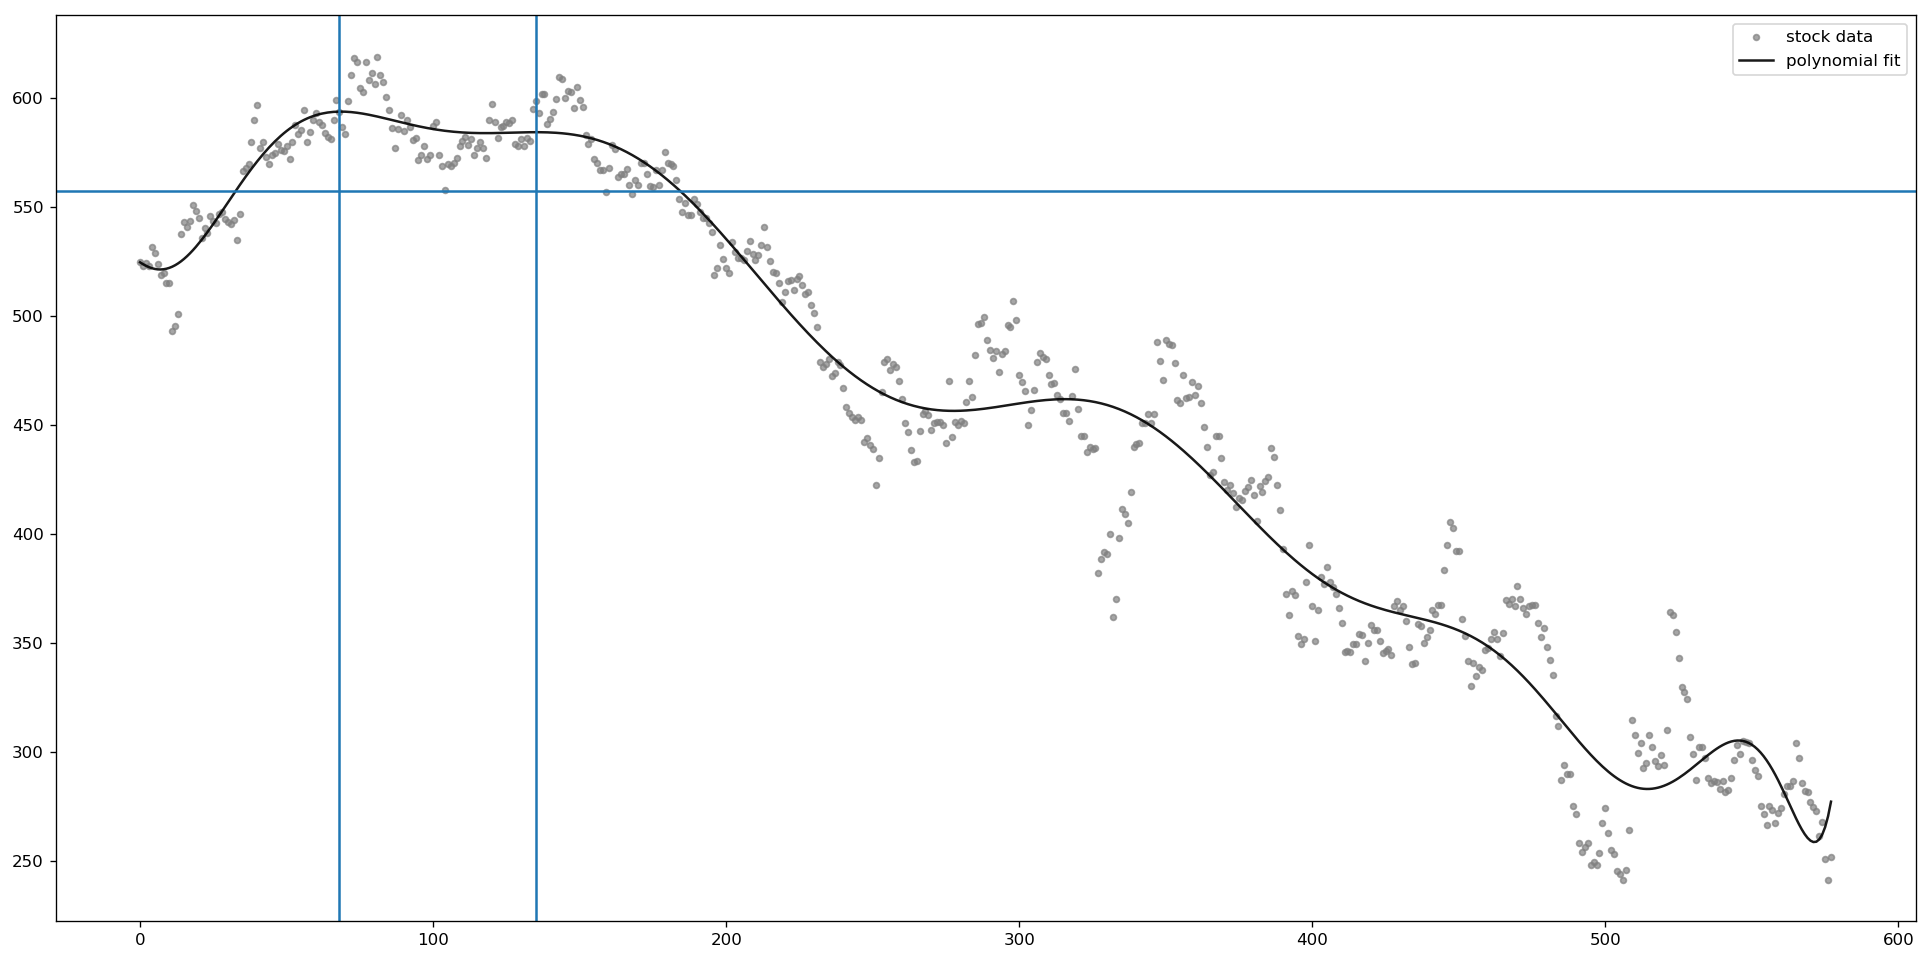

In [11]:
print(y_dict)

# ___ plotting ___
plt.figure(figsize=(20, 10), dpi= 120, facecolor='w', edgecolor='k')
# plot stock data
plt.plot(x_data, y_data, 'o', markersize=3.5, color='grey', alpha=0.7)
# plot polynomial fit
plt.plot(x, y_pol, '-', markersize=1.0, color='black', alpha=0.9)
plt.legend(['stock data', 'polynomial fit'])

for position in suspected_tops:
    plt.axvline(x=position)

plt.axhline(threshold)    

plt.show()